## IMSA-NUIST 2023 TRAINING BY EKWACU SAMUEL (ekwacu@gmail.com)

In this ssession, the tasks includes;
1. Plot 4 panels
2. Plot Linear trend line
3. Plot Runing mean
4. MK trend test
5. Pearson Corrolation test
5. Linear regreation anlysis.

In [59]:
#Import the necessary libraries to enable us perform our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymannkendall as mk

In [60]:
df= pd.read_csv('C:/Users/Samuel-NUIST/Desktop/lecture3/dammy_DD.csv')
#df             ## Prints out a sample of the data
#df.info()      ## describe your data
df.columns     ## Check the column headers
#df.head(5)
#df.shape       ## Check the number of rows and columns
#df.describe()  ## Get summary statistics about your data
#df[["tmax_Ug"]].describe()  ## Summary statistics on particular columns as a dataframe
#df["tmax_Ug"].describe()  ## Summary statistics on particular columns as a series
#df.sort_values(by="tmax_Ug", ascending = False) ## Sort the data in descending order

Index(['Years', 'Af_DD', 'EA_DD', 'NA_DD', 'SA_DD', 'WA_DD'], dtype='object')

In [61]:
# calculating exponential moving average
# using .ewm(span).mean() , with window size = 10
df['NA_DD10'] =df['NA_DD'].ewm(span=10).mean()
df['EA_DD10'] =df['EA_DD'].ewm(span=10).mean()
df['WA_DD10'] =df['WA_DD'].ewm(span=10).mean()
df['SA_DD10'] =df['SA_DD'].ewm(span=10).mean()
df['Af_DD10'] =df['Af_DD'].ewm(span=10).mean()

# printing Dataframe
#df['NA_DD10']
#df['EA_DD10']
#df['WA_DD10']
#df['SA_DD10']
#df['Af_DD10']

### Mann Kendal Trend

In [62]:
d0 = mk.original_test(df['Af_DD'])
print(d0)

Mann_Kendall_Test(trend='increasing', h=True, p=2.0103918529912335e-12, z=7.033755142178423, Tau=0.6180327868852459, s=1131.0, var_s=25809.666666666668, slope=1.1913919413919414, intercept=41.25824175824176)


In [63]:
d0 = mk.original_test(df['NA_DD'])
print(d0)

Mann_Kendall_Test(trend='increasing', h=True, p=2.966786816216427e-09, z=5.933425489555549, Tau=0.521311475409836, s=954.0, var_s=25797.333333333332, slope=1.0253205128205127, intercept=46.24038461538461)


In [64]:
d0 = mk.original_test(df['SA_DD'])
print(d0)

Mann_Kendall_Test(trend='no trend', h=False, p=0.1319040038998469, z=-1.5066359242241956, Tau=-0.13278688524590163, s=-243.0, var_s=25799.666666666668, slope=-0.30045132172791744, intercept=86.01353965183752)


### Plot  a graph 

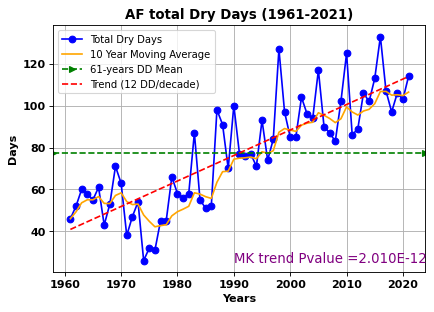

In [65]:
fig = plt.figure(figsize=(6,4))
#plot 1
plt.plot(df['Years'], df['Af_DD'],color='blue', marker='o')
plt.plot(df['Years'], df['Af_DD10'],color='orange')#, marker='o')
plt.title('AF total Dry Days (1961-2021)', fontsize=12, fontweight='bold')
plt.ylabel('Days', fontsize=10, fontweight='bold')
plt.xlabel('Years', fontsize=10, fontweight='bold')
plt.yticks(np.arange(0, 140, 20), fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.axhline(y = 77.40983607, color = 'green', linestyle = '--', marker='>')
z = np.polyfit(df['Years'], df['Af_DD'], 1)
p = np.poly1d(z)
plt.plot(df['Years'],p(df['Years']),"r--")
plt.legend(['Total Dry Days','10 Year Moving Average','61-years DD Mean',\
                'Trend (12 DD/decade)'], loc = 'upper left',fontsize=9)
plt.text(1990, 25, 'MK trend Pvalue =2.010E-12',fontsize = 12, color ='purple')
plt.grid(True)
#plt.savefig('C:/Users/Samuel-NUIST/Desktop/lecture3/Africa dd.png')

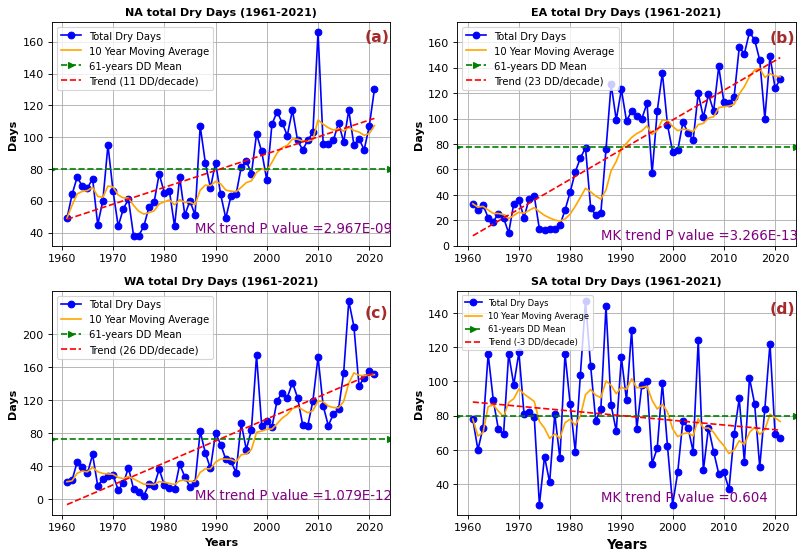

In [67]:
fig, ax = plt.subplots(2,2, figsize =(12,8))

#plot 1
ax[0,0].plot(df['Years'], df['NA_DD'],color='blue', marker='o')
ax[0,0].plot(df['Years'], df['NA_DD10'],color='orange')#, marker='o')
ax[0,0].set_title('NA total Dry Days (1961-2021)', fontsize=10, fontweight='bold')
ax[0,0].set_ylabel('Days', fontsize=10, fontweight='bold')
#ax[0,0].set_xlabel('Years', fontsize=12, fontweight='bold')
ax[0,0].set_yticks(np.arange(0, 200, 20), fontsize=10, fontweight='bold')
ax[0,0].axhline(y = 80.08196721, color = 'green', linestyle = '--', marker='>')
z = np.polyfit(df['Years'], df['NA_DD'], 1)
p = np.poly1d(z)
ax[0,0].plot(df['Years'],p(df['Years']),"r--")
ax[0,0].legend(['Total Dry Days','10 Year Moving Average','61-years DD Mean',\
                'Trend (11 DD/decade)'], loc = 'upper left',fontsize=9)
ax[0,0].text(1986, 40, 'MK trend P value =2.967E-09',fontsize = 12, color ='purple')
ax[0,0].text(2019, 160, '(a)',fontsize = 14, color ='brown', fontweight='bold')
ax[0,0].grid(True)

#plot 2
ax[0,1].plot(df['Years'], df['EA_DD'],color='blue', marker='o')
ax[0,1].plot(df['Years'], df['EA_DD10'],color='orange')#, marker='o')
ax[0,1].set_title('EA total Dry Days (1961-2021)', fontsize=10, fontweight='bold')
ax[0,1].set_ylabel('Days', fontsize=10, fontweight='bold')
ax[0,1].set_yticks(np.arange(0, 200, 20), fontsize=10, fontweight='bold')
ax[0,1].axhline(y = 77.86885246, color = 'green', linestyle = '--', marker='>')
z = np.polyfit(df['Years'], df['EA_DD'], 1)
p = np.poly1d(z)
ax[0,1].plot(df['Years'],p(df['Years']),"r--")
ax[0,1].legend(['Total Dry Days','10 Year Moving Average','61-years DD Mean',\
                'Trend (23 DD/decade)'], loc = 'upper left',fontsize=9)
ax[0,1].text(1986, 5, 'MK trend P value =3.266E-13',fontsize = 12, color ='purple')
ax[0,1].text(2019, 160, '(b)',fontsize = 14, color ='brown',fontweight='bold')
ax[0,1].grid(True)

#plot 3
ax[1,0].plot(df['Years'], df['WA_DD'],color='blue', marker='o')
ax[1,0].plot(df['Years'], df['WA_DD10'],color='orange')#, marker='o')
ax[1,0].set_title('WA total Dry Days (1961-2021)', fontsize=10, fontweight='bold')
ax[1,0].set_ylabel('Days', fontsize=10, fontweight='bold')
ax[1,0].set_xlabel('Years', fontsize=10, fontweight='bold')
plt.xlabel('Years', fontsize=12, fontweight='bold')
ax[1,0].set_yticks(np.arange(0, 240, 40), fontsize=10,fontweight='bold')
ax[1,0].axhline(y = 73.06557377, color = 'green', linestyle = '--', marker='>')
z = np.polyfit(df['Years'], df['WA_DD'], 1)
p = np.poly1d(z)
ax[1,0].plot(df['Years'],p(df['Years']),"r--")
ax[1,0].legend(['Total Dry Days','10 Year Moving Average','61-years DD Mean',\
                'Trend (26 DD/decade)'], loc = 'upper left',fontsize=9)
ax[1,0].text(1986, 0, 'MK trend P value =1.079E-12',fontsize = 12, color ='purple')
ax[1,0].text(2019, 220, '(c)',fontsize = 14, color ='brown',fontweight='bold')
ax[1,0].grid(True)

#plot 4
ax[1,1].plot(df['Years'], df['SA_DD'],color='blue', marker='o' )
ax[1,1].plot(df['Years'], df['SA_DD10'],color='orange')#, marker='o')
ax[1,1].set_title('SA total Dry Days (1961-2021)', fontsize=10, fontweight='bold')
ax[1,1].set_ylabel('Days', fontsize=10, fontweight='bold')
ax[1,1].set_xlabel('Years', fontsize=12, fontweight='bold')
ax[1,1].set_yticks(np.arange(0, 200, 20),fontsize=10, fontweight='bold')
ax[1,1].axhline(y = 79.72131148, color = 'green', linestyle = '--', marker='>')
z = np.polyfit(df['Years'], df['SA_DD'], 1)
p = np.poly1d(z)
ax[1,1].plot(df['Years'],p(df['Years']),"r--")
ax[1,1].legend(['Total Dry Days ','10 Year Moving Average','61-years DD Mean',\
                'Trend (-3 DD/decade)'], loc = 'upper left',fontsize=7.5)
ax[1,1].grid(True)
ax[1,1].text(1986, 30, 'MK trend P value =0.604',fontsize = 12, color ='purple')
ax[1,1].text(2019, 140, '(d)',fontsize = 14, color ='brown',fontweight='bold')
#plt.savefig(home_dir + 'Total days of DD_4plots.png')
plt.show()

### Pearson Linear Correlation and Regression 

In [68]:
# Import those libraries
import pandas as pd
import scipy.stats
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# Import your data into Python
home_dir = 'C:/Users/Samuel-NUIST/Desktop/lecture3/'
df1 = pd.read_csv(home_dir +'dammy_corr.csv')
df1.columns 

Index(['Years', 'Atlantic', 'Indian', 'Pacific', 'EA_DD', 'NA_DD', 'SA_DD',
       'WA_DD'],
      dtype='object')

In [87]:
pearsons_coefficient = np.corrcoef(df1['EA_DD'], df1['Indian'])
print("The pearson's coeffient of the x and y inputs are: \n" ,pearsons_coefficient)

The pearson's coeffient of the x and y inputs are: 
 [[1.         0.86879525]
 [0.86879525 1.        ]]


In [86]:
# Apply the pearsonr()
corr, _ = scipy.stats.pearsonr(df1['Indian'], df1['EA_DD'])
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.869


In [83]:
#Correlation Analysis
scipy.stats.pearsonr(df1['EA_DD'], df1['Indian'])    # Pearson's r
#scipy.stats.spearmanr(df1['Indian'], df1['EA_DD'])   # Spearman's rho
#scipy.stats.kendalltau(df1['Indian'], df1['EA_DD'])  # Kendall's tau

PearsonRResult(statistic=0.8687952485538132, pvalue=1.1589254790408304e-19)

([<matplotlib.axis.XTick at 0x212a3294d30>,
 [Text(-2.5, 0, '−2.5'),
  Text(-2.0, 0, '−2.0'),
  Text(-1.5, 0, '−1.5'),
  Text(-1.0, 0, '−1.0'),
  Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0')])

<Figure size 960x800 with 0 Axes>

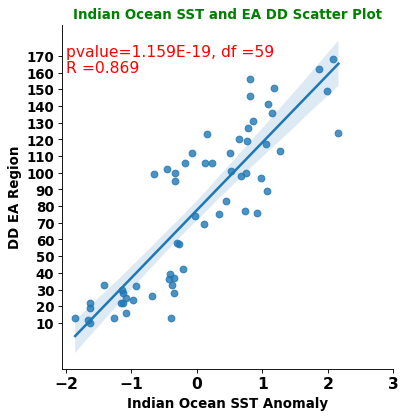

In [85]:
import seaborn as sns
fig = plt.figure(figsize=(12,10))
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
sns.lmplot(x='Indian', y='EA_DD', data=df)
plt.title('Indian Ocean SST and EA DD Scatter Plot', fontsize=12,color ='green', fontweight='bold')
plt.ylabel('DD EA Region', fontsize=12, fontweight='bold')
plt.xlabel('Indian Ocean SST Anomaly', fontsize=12, fontweight='bold')
plt.yticks(np.arange(10, 180, 10), fontsize=12, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.text(-2, 170, 'pvalue=1.159E-19, df =59',fontsize = 14, color ='red')
plt.text(-2, 160, 'R =0.869',fontsize = 14, color ='red')
#plt.text(-2, 150, 't =13.725',fontsize = 14, color ='red')
plt.xticks(np.arange(-2, 4, 1))
#plt.savefig(home_dir + 'corr_EA_SST.jpeg')

###  Explaination Notes
1. Correlation is tightly connected to other statistical quantities like the mean, standard deviation, variance, and covariance. If you want to learn more about these quantities and how to calculate them with Python, then check out Descriptive Statistics with Python.
2. There are several statistics that you can use to quantify correlation. In this tutorial, you’ll learn about three correlation coefficients:
3. Pearson’s r
4. Spearman’s rho
5. Kendall’s tau
6. Pearson’s coefficient measures linear correlation, while the Spearman and Kendall coefficients compare the ranks of data. 

### 2. Linear Regression: (SciPy Implementation)
1. Linear regression is the process of finding the linear function that is as close as possible to the actual relationship between features. 
2. In other words, you determine the linear function that best describes the association between the features. 
3. This linear function is also called the regression line.
4. The results are #### slope: the slope of the regression line, intercept: the intercept of the regression line,pvalue: the p-value, stderr: the standard error of the estimated gradien

In [77]:
result = scipy.stats.linregress(df1['Indian'], df1['EA_DD'])
result

LinregressResult(slope=40.599267166891394, intercept=77.62259460898771, rvalue=0.8687952485538132, pvalue=1.1589254790408212e-19, stderr=3.0125231542896826, intercept_stderr=3.03257856945201)

## God is Great 